In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 5: Game of Thrones, Twitter, and Text

## Due Date: Wednesday 11/5, 11:59 pm PST

In this assignment, we will work with Twitter data in order to analyze ~20,000 tweets about the final season of Game of Thrones. Our ultimate goal is to deconstruct tweets into their individual words and assign a sentiment score to each, evaluating the overall sentiment of each tweet toward Game of Thrones.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

In [2]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [3]:
got = pd.read_csv("./data/gotTwitter.csv")
got.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width
0,x427124533,x1120174512736280577,4/22/2019 3:56,WOMAXO,So Game of Thrones is just basically about who<U+2019>s gonna be the next Hokage?,Twitter for iPhone,74
1,x949794998010163200,x1117612261806419975,4/15/2019 2:15,BbalEvv,"Is Game of Thrones really that good? Man, it is mentioned anywhere you look today. \n\nWhat’s the big deal? \n\nIs it as good as Billions? We are in the middle of that series. Game of Thrones can’t be as good as Billions. \n\nJust can’t be.",Twitter for iPhone,240
2,x281627203,x1126361110246879232,5/9/2019 5:39,Krachtworks,@ThomasLBarr This is some game of thrones action right here. #TempeThrone,Twitter for iPhone,60
3,x168322273,x1125175463549198337,5/5/2019 23:08,MrCamW,"Before more fan faves potentially perish (?) today, here's my piece on the morality of 'Game of Thrones' and leadership https://t.co/uhPfCoQMeP",Twitter Web Client,143
4,x1472761238,x1128279188786511872,5/14/2019 12:41,jeniecet,Game of Thrones episode 1 season 1. <U+0001F643>,Twitter for iPhone,37


---
# Part 1: Tweet Source Analysis

In the following questions, we are going to first look at the types of devices used when tweeting about Game of Thrones.

First let's examine the source field:

In [4]:
got['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'dlvr.it',
       'Twitter for Android', 'Sprinklr', 'Facebook', 'Twitter Web App',
       'SocialFlow', 'TweetDeck', 'Tweetbot for iΟS', 'Stars TVMag',
       'IFTTT', 'Twibble.io', 'twiteradious', 'Sprout Social',
       'WordPress.com', 'potenciaok', 'DealFinder App', 'Sortiwa News',
       'trueAnthem', 'Post Planner Inc.', 'Google', 'Twitter for iPad',
       'Cloudhopper', 'Instagram', 'Buffer', 'Tweetbot for Mac',
       'Reddit Official', 'Tweetbot for i<U+039F>S', 'Twuffer',
       'Echobox Social', 'the crypto report', 'Talon (Plus)', 'TheWrap',
       'elementarty', 'DiasporaEngager', 'Trakt.tv', 'RiteKit', 'TwNYY',
       'Untappd', 'Hootsuite Inc.', 'SocialOomph',
       'the analytical engine', 'EIN News Publisher',
       'I Just Want To Tweet', 'Heart The Mart', 'AwayToshare',
       'LinkedIn', 'BebaCornish', 'TV Time, TV show tracker', 'Periscope',
       'hassantariqblog', 'Mastodon-Twitter Crossposter', 'Pinterest',

### Question 1.1

That's a ton of apps, so maybe we should zoom in on only the most relevant. Create a barplot representing counts of the 10 most-used devices/apps ("source") in our tweets. 

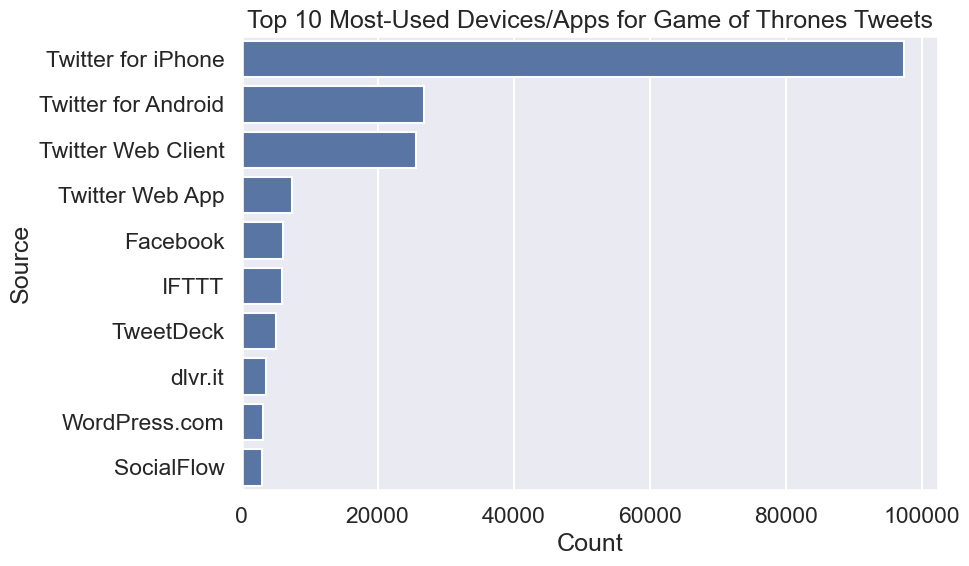

In [5]:
top_10_sources = got['source'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_sources.values, y=top_10_sources.index)
plt.xlabel('Count')
plt.ylabel('Source')
plt.title('Top 10 Most-Used Devices/Apps for Game of Thrones Tweets')
plt.tight_layout()
plt.show()

### Question 1.2

Our data represents tweets acriss the release window of all 6 final episodes of the series. Let's see if we can determine when these episodes were released based on the frequency of tweets. As a first step, convert `created_at` into a datetime object using `pd.to_datetime`. You can use [this as a reference](https://pandas.pydata.org/docs/reference/api/pandas.Period.strftime.html) when specifying the format. 

In [6]:
got["created_at"] = pd.to_datetime(got["created_at"])
got["created_at"].head(7)

0   2019-04-22 03:56:00
1   2019-04-15 02:15:00
2   2019-05-09 05:39:00
3   2019-05-05 23:08:00
4   2019-05-14 12:41:00
5   2019-05-20 19:01:00
6   2019-04-15 22:54:00
Name: created_at, dtype: datetime64[ns]

In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Question 1.3

Identify the timespan of the dates in our tweet data.

*Note*: We can treat datetime objects like numeric variables.

In [8]:
timespan = np.max(got['created_at']) - np.min(got['created_at'])
timespan

Timedelta('50 days 12:09:00')

In [9]:
grader.check("q1_3")

q1_3 results: All test cases passed!

### Question 1.4

Now create a histogram of our newly converted datetime column. You don't need to worry about making the x-axis labels legible for q1_4 and q1_5. 

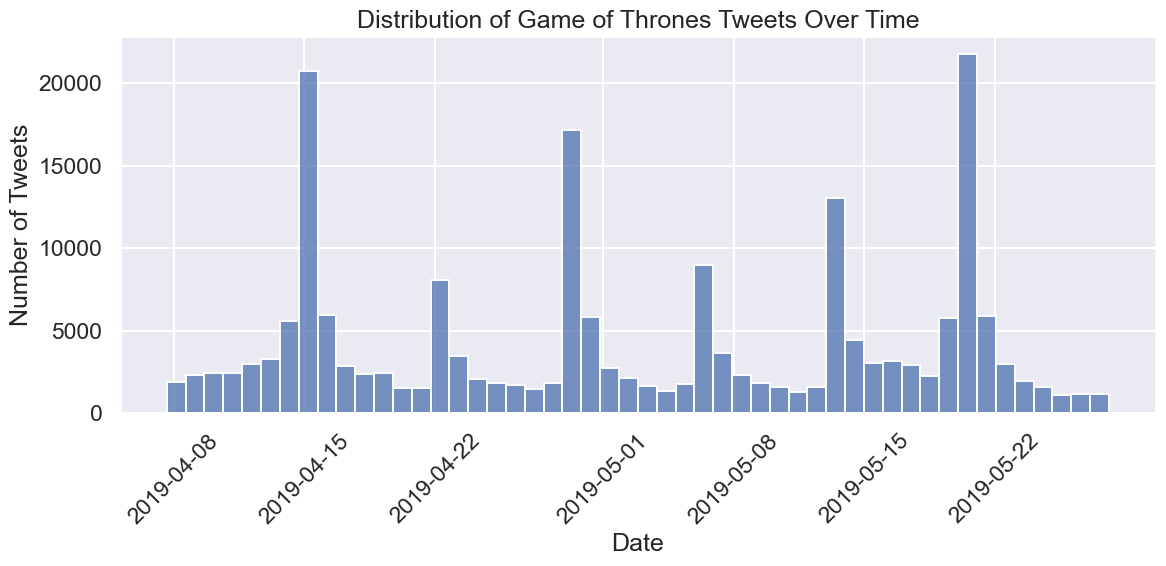

In [10]:
plt.figure(figsize=(12, 6))

sns.histplot(got["created_at"], bins=50, kde=False)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Game of Thrones Tweets Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Of the 6 episodes released, which do you think were the most popular or polarizing and which were the least?

**Your response**: The most talked-about episodes were the last one on May 19 (over 20,000 tweets) and the third one on April 28 (over 17,000 tweets). The least discussed were the second episode on April 21 and the fourth on May 5, each with about 8,000 tweets.

### Question 1.5

Plot three overlapping KDE plots, one each for tweets from "Twitter for iPhone", "Twitter for Android", and "Twitter Web Client".

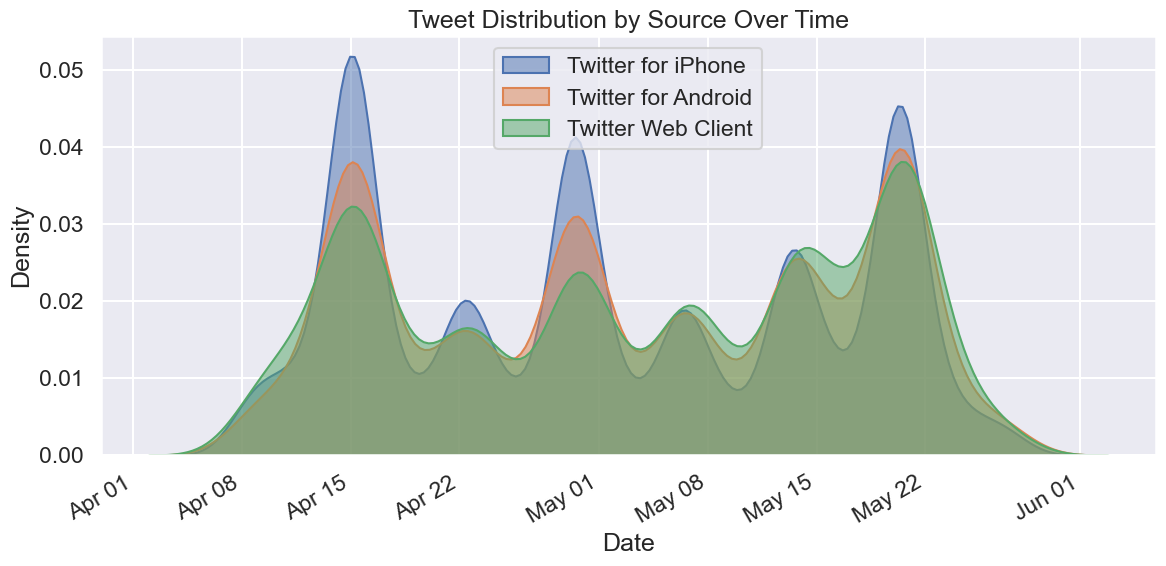

In [14]:
iphone_data = got[got['source'] == 'Twitter for iPhone']
android_data = got[got['source'] == 'Twitter for Android']
webclient_data = got[got['source'] == 'Twitter Web Client']

plt.figure(figsize=(12, 6))

sns.kdeplot(data=iphone_data, x='created_at', label='Twitter for iPhone', fill=True, alpha=0.5)
sns.kdeplot(data=android_data, x='created_at', label='Twitter for Android', fill=True, alpha=0.5)
sns.kdeplot(data=webclient_data, x='created_at', label='Twitter Web Client', fill=True, alpha=0.5)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # e.g., "Apr 21"
plt.gcf().autofmt_xdate()  # rotate labels for better fit

plt.xlabel('Date')
plt.ylabel('Density')
plt.title('Tweet Distribution by Source Over Time')
plt.legend()

plt.tight_layout()
plt.show()


What do you know notice about how the temporal pattern in tweets from the web app differs from the temporal pattern of the mobile apps. What can you infer from this?

**Your response**: Tweets from mobile iPhone and Androi show sharper spikes, which means people tweet more during specific times, likely while watching live. Tweets from the web app are more spread out, suggesting users post more evenly over time.
 

# Part 2: Sentiment Analysis

It turns out that we can use the words in our Game of Thrones tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I loved the episode!" has positive sentiment, whereas the sentence "I hate Cersei!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I loved the episode!" is more positive than "I liked the episode."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of our tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [15]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



As you can see, the lexicon contains emojis too! Each row contains a word and the *polarity* of that word, measuring how positive or negative the word is.

The creators of VADER describe the tool’s assessment of polarity, or “compound score,” in the following way:

“The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.”

As you can see, VADER doesn't "read" sentences, but works by parsing sentences into words assigning a preset generalized score from their testing sets to each word separately. 

VADER relies on humans to stabilize its scoring. The creators use Amazon Mechanical Turk, a crowdsourcing survey platform, to train its model. Its training set of data consists of a small corpus of tweets, New York Times editorials and news articles, Rotten Tomatoes reviews, and Amazon product reviews, tokenized using the natural language toolkit (NLTK). Each word in each dataset was reviewed and rated by at least 20 trained individuals who had signed up to work on these tasks through Mechanical Turk. 

### Question 2.1

Please score the sentiment of one of the following words:
- police
- order
- Democrat
- Republican
- gun
- dog
- technology
- TikTok
- security
- face-mask
- science
- climate change
- vaccine

What score did you give it and why? Can you think of a situation in which this word would carry the opposite sentiment to the one you’ve just assigned?

**Your response**: The word vaccine usually has a positive meaning because it’s connected to health, safety, and protection from diseases. People often use it in a hopeful or thankful way. However, in some situations, the word can take on a negative tone. A tool like VADER might not recognize the negative emotion behind how it’s being used.


### Question 2.2

VADER aggregates the sentiment of words in order to determine the overall sentiment of a sentence, and further aggregates sentences to assign just one aggregated score to a whole tweet or collection of tweets. This is a complex process and if you'd like to learn more about how VADER aggregates sentiment, here is the info at this [link](https://github.com/cjhutto/vaderSentiment#introduction).

Are there circumstances (e.g. certain kinds of language or data) when you might not want to use VADER? What features of human speech might VADER misrepresent or fail to capture?


**Your response**: VADER doesn’t work well with sarcasm, slang, or political language because it can’t understand tone or context. It might get words like “sick” or “killer” wrong since they can mean good or bad depending on how they’re used. Since VADER looks at words one by one, it can miss things like irony or mixed emotions in real speech.


### Question 2.3

Read `vader_lexicon.txt` into a DataFrame called `sent`. `sent` should have two columns named `word` and `polarity`, storing the polarity of each word.

In [16]:
sent_data = []
with open("vader_lexicon.txt", 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) >= 2:
            word = parts[0]
            polarity = float(parts[1])
            sent_data.append({'word': word, 'polarity': polarity})

sent = pd.DataFrame(sent_data)
sent.head()

,word,polarity
0,$:,-1.5
1,%),-0.4
2,%-),-1.5
3,&-:,-0.4
4,&:,-0.7


In [17]:
grader.check("q2_3")

q2_3 results: All test cases passed!

### Question 2.4

Now, let's use this lexicon to calculate the overall sentiment for each of tweet about Game of Thrones. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

There are a number of elements in each tweet that we don't want in our sentiment analysis. Two obvious examples are @s and #s. Remove any @ references or hashtag references in the text of our tweets. 

**Hints:** 
* Use `got['text'].str.replace` along with a regular expression.
* You may find it helpful to experiment with regular expressions at [regex101.com](https://regex101.com/).

In [18]:
pat = r'@\w+|#\w+'
got["text"] = got['text'].str.replace(pat, '', regex=True)
got.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width
0,x427124533,x1120174512736280577,2019-04-22 03:56:00,WOMAXO,So Game of Thrones is just basically about who<U+2019>s gonna be the next Hokage?,Twitter for iPhone,74
1,x949794998010163200,x1117612261806419975,2019-04-15 02:15:00,BbalEvv,"Is Game of Thrones really that good? Man, it is mentioned anywhere you look today. \n\nWhat’s the big deal? \n\nIs it as good as Billions? We are in the middle of that series. Game of Thrones can’t be as good as Billions. \n\nJust can’t be.",Twitter for iPhone,240
2,x281627203,x1126361110246879232,2019-05-09 05:39:00,Krachtworks,This is some game of thrones action right here.,Twitter for iPhone,60
3,x168322273,x1125175463549198337,2019-05-05 23:08:00,MrCamW,"Before more fan faves potentially perish (?) today, here's my piece on the morality of 'Game of Thrones' and leadership https://t.co/uhPfCoQMeP",Twitter Web Client,143
4,x1472761238,x1128279188786511872,2019-05-14 12:41:00,jeniecet,Game of Thrones episode 1 season 1. <U+0001F643>,Twitter for iPhone,37


In [19]:
grader.check("q2_4")

q2_4 results: All test cases passed!

### Question 2.5

Notice how nearly all of our tweets end with a url. These characters similarly represent nonsense as far as our sentiment analysis is concerned. In the cell below, clean up the `text` field by removing URLs from each `text` entry.

In [20]:
pat = r'https?://\S+'
got["text"] = got['text'].str.replace(pat, '', regex=True)
got.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width
0,x427124533,x1120174512736280577,2019-04-22 03:56:00,WOMAXO,So Game of Thrones is just basically about who<U+2019>s gonna be the next Hokage?,Twitter for iPhone,74
1,x949794998010163200,x1117612261806419975,2019-04-15 02:15:00,BbalEvv,"Is Game of Thrones really that good? Man, it is mentioned anywhere you look today. \n\nWhat’s the big deal? \n\nIs it as good as Billions? We are in the middle of that series. Game of Thrones can’t be as good as Billions. \n\nJust can’t be.",Twitter for iPhone,240
2,x281627203,x1126361110246879232,2019-05-09 05:39:00,Krachtworks,This is some game of thrones action right here.,Twitter for iPhone,60
3,x168322273,x1125175463549198337,2019-05-05 23:08:00,MrCamW,"Before more fan faves potentially perish (?) today, here's my piece on the morality of 'Game of Thrones' and leadership",Twitter Web Client,143
4,x1472761238,x1128279188786511872,2019-05-14 12:41:00,jeniecet,Game of Thrones episode 1 season 1. <U+0001F643>,Twitter for iPhone,37


In [21]:
grader.check("q2_5")

q2_5 results: All test cases passed!

### Question 2.6

Next, let's remove any unusual characters (which generally represent emojis on twitter) and punctuation that won't be useful in our sentiment analysis. *i.e.* Let's only keep upper-case and lower-case alphabetic characters, and spaces. Then lowercase all of the text in the tweets since the lexicon is also lowercase.

In [22]:
pat = r'[^a-zA-Z\s]'
got["text"] = got['text'].str.replace(pat, '', regex=True)
# Lowercase everything
got['text'] = got['text'].str.lower()
got.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width
0,x427124533,x1120174512736280577,2019-04-22 03:56:00,WOMAXO,so game of thrones is just basically about whous gonna be the next hokage,Twitter for iPhone,74
1,x949794998010163200,x1117612261806419975,2019-04-15 02:15:00,BbalEvv,is game of thrones really that good man it is mentioned anywhere you look today \n\nwhats the big deal \n\nis it as good as billions we are in the middle of that series game of thrones cant be as good as billions \n\njust cant be,Twitter for iPhone,240
2,x281627203,x1126361110246879232,2019-05-09 05:39:00,Krachtworks,this is some game of thrones action right here,Twitter for iPhone,60
3,x168322273,x1125175463549198337,2019-05-05 23:08:00,MrCamW,before more fan faves potentially perish today heres my piece on the morality of game of thrones and leadership,Twitter Web Client,143
4,x1472761238,x1128279188786511872,2019-05-14 12:41:00,jeniecet,game of thrones episode season uf,Twitter for iPhone,37


In [23]:
grader.check("q2_6")

q2_6 results: All test cases passed!

### Question 2.7

Now, let's convert the tweets into a tidy format to make the sentiments easier to calculate. Use the `text` column of `got` to create a Dataframe called `tidy_got`. It has three columns:

1. `id`: The id of the tweet, which can take on any value 0 - n unique tweets.
2. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
3. `word`: The individual words of each tweet.

The first few rows of `tidy_got` should look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>id</th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>ok</td>
    </tr>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>so</td>
    </tr>
    <tr>
      <th>0</th>
      <td>2</td>
      <td>i</td>
    </tr>
    <tr>
      <th>0</th>
      <td>3</td>
      <td>think</td>
    </tr>
    <tr>
      <th>0</th>
      <td>4</td>
      <td>my</td>
    </tr>
  </tbody>
</table>

**Note that your DataFrame may look different from the one above.** Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 3 methods on the `got` DataFrame.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [24]:
tidy_got = (
    got['text']
    .str.split(expand=True)
    .stack()
    .reset_index(level=1, drop=False)
    .reset_index(drop=False)
    .rename(columns={'level_1': 'num', 0: 'word', 'index': 'id'})
)

tidy_got = tidy_got[tidy_got['word'] != '']

tidy_got.head()

,id,num,word
0,0,0,so
1,0,1,game
2,0,2,of
3,0,3,thrones
4,0,4,is


In [25]:
grader.check("q2_7")

q2_7 results: All test cases passed!

### Question 2.8

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `got` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hints:** 
* You will need to merge `tidy_got` and `sent` and group the final answer.
* If certain words are not found in the `sent` table, set their polarities to 0.


In [26]:
tidy_got_sent = tidy_got.merge(sent, on='word', how='left').fillna({'polarity': 0})
got['polarity'] = tidy_got_sent.groupby('id')['polarity'].sum()
got['polarity'] = got['polarity'].fillna(0)
got.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,polarity
0,x427124533,x1120174512736280577,2019-04-22 03:56:00,WOMAXO,so game of thrones is just basically about whous gonna be the next hokage,Twitter for iPhone,74,0.0
1,x949794998010163200,x1117612261806419975,2019-04-15 02:15:00,BbalEvv,is game of thrones really that good man it is mentioned anywhere you look today \n\nwhats the big deal \n\nis it as good as billions we are in the middle of that series game of thrones cant be as good as billions \n\njust cant be,Twitter for iPhone,240,5.7
2,x281627203,x1126361110246879232,2019-05-09 05:39:00,Krachtworks,this is some game of thrones action right here,Twitter for iPhone,60,0.0
3,x168322273,x1125175463549198337,2019-05-05 23:08:00,MrCamW,before more fan faves potentially perish today heres my piece on the morality of game of thrones and leadership,Twitter Web Client,143,1.3
4,x1472761238,x1128279188786511872,2019-05-14 12:41:00,jeniecet,game of thrones episode season uf,Twitter for iPhone,37,0.0


In [27]:
grader.check("q2_8")

q2_8 results: All test cases passed!

Now we have a measure of the sentiment of each of his tweets! Note that this calculation is rather basic; you can read over the VADER readme to understand a more robust sentiment analysis.

Now, run the cells below to see the most positive and most negative tweets about Game of Thrones in our dataset:

In [28]:
print('Most negative tweets:')
for t in got.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   just gave nick a whole lecture on game of thrones watching etiquette  
 if you speak ill kill you
 if you eat crunchy foods ill kill you
 if you dont keep the dogs quiet ill kill you
 if you pause it ill kill you
 if you step in front of the tv ill kill you

   letus face it game of thrones is a tragedy thatus how itus going to end arya will die without killing cersei jamie will kill cersei and his own unborn child jon will kill dany to become azhor ahai and forge a sword capable of killing the likely true threat an evil bran

    great episode but a bullshit ending that made no sense and no character of significance was killed off
game of thrones has gone soft
game of thrones has the walking dead curse now
too scared to kill off major characters
they just fake kill em off now



   yet he will come raging war on evil and eventually destroy the last enemy who is deathso he may have suspended it but not endedthere is another war left to wage and it is the war t

In [29]:
print('Most positive tweets:')
for t in got.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   game of thrones you really outdid yourself this time 
wow wow wow wow wow wow wow wow wow wow wow wow wow wow
best episode ive ever watched from the best tv show ive ever watched ufufufufufuf
 

    my thought is that tony stark is a great great great great great great great great great grandson of one of the starks in game of thronesand im sure someone has a fanfic of that somewhere

   when it comes to game of thrones i dont care that you dont care that i dont care that you dont care that i dont care that you dont care that i dont care that you dont care that i dont care that you dont care that i dont care that you dont care that i dont care that

    people that dont watch game of thrones love love love love looooove love love love telling you that they dont watch got  likethey love it  more than anything

    the other day i was with my best friend binging on food and watching her favorite game of thrones lol itus not me tho lol now ium about to binge on t

### Question 2.9

Read the 5 most positive and 5 most negative tweets. Do you think these tweets are accurately represented by their polarity scores?

**Your response:** Most of the scores make sense. The negative tweets sound angry or upset, with words like “kill” or “bullshit.” The positive ones sound happy and excited, using words like “love” and “great.” But some tweets might be scored wrong if they’re sarcastic or joking, since VADER can’t tell the tone.


### Question 2.10

Now, let's try looking at the distributions of sentiments for tweets containing the names of certain characters. In the cell below, create a single plot showing the KDE plots of tweet sentiments for tweets regarding three characters from Game of Thrones. If you don't know any, you can use 'daenerys', 'john snow', and 'cersei'.

In [ ]:
plt.figure(figsize=(12, 6))

daenerys_tweets = got[got['text'].str.contains('daenerys', na=False)]
jon_tweets = got[got['text'].str.contains('jon', na=False) | got['text'].str.contains('snow', na=False)]
cersei_tweets = got[got['text'].str.contains('cersei', na=False)]

sns.kdeplot(data=daenerys_tweets['polarity'], label='Daenerys', fill=True, alpha=0.5)
sns.kdeplot(data=jon_tweets['polarity'], label='Jon Snow', fill=True, alpha=0.5)
sns.kdeplot(data=cersei_tweets['polarity'], label='Cersei', fill=True, alpha=0.5)

plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.title('Sentiment Distribution for Game of Thrones Characters')
plt.legend()

plt.tight_layout()
plt.show()

### Question 2.11
Comment on what you observe in the plot above. Do the location of the peaks, their height or the spread of the distributions differ? What might this suggest about sentiment of these characters?

**Your Response:** Most tweets about Jon Snow are neutral, so his line is tall and close to 0, whereas Daenerys has more mixed feelings because some are positivevand some are negative. Cersei has more negative tweets, showing people dislike. 

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order.  Then execute the following two commands from the File menu:

* Save and Checkpoint
* Close and Halt

Then submit your .ipynb file to the HW5 assignment in Canvas.